### Changing K 

In this notebook, we will get some practice with different values of **k**, and how it changes the clusters that are observed in the data.  As well as how to determine what the best value for **k** might be for a dataset.

To get started, let's read in our necessary libraries.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from IPython import display

%matplotlib inline

# Make the images larger
plt.rcParams['figure.figsize'] = (16, 9)

`1.` To get started, there is a function called **simulate_data** within the **helpers2** module.  Read the documentation on the function by running the cell below.  Then use the function to simulate a dataset with 200 data points (rows), 5 features (columns), and 4 centers

In [14]:
def simulate_data(n = 500, features = 10, centroids = 3):
    '''
    Simulates n data points, each with number of features equal to features, with a number of centers equal to centroids
    INPUT (defaults)
        n = number of rows (500)
        features = number of columns (10)
        centroids = number of centers (3)
    Output
        dataset = a dataset with the the specified characteristics
    '''
    dataset, y = make_blobs(n_samples=n, n_features=features, centers=centroids, random_state=42)

    return dataset

In [15]:
simulate_data?

In [16]:
data = simulate_data(200, 5, 4)

`2.` Because of how you set up the data, what should the value of **k** be?

In [17]:
k_value = 4
k_value

4

`3.` Let's try a few different values for **k** and fit them to our data using **KMeans**.

To use KMeans, you need to follow three steps:

**I.** Instantiate your model.

**II.** Fit your model to the data.

**III.** Predict the labels for the data.

In [18]:
def plot_data(data, labels):
    '''
    Plot data with colors associated with labels
    '''
    fig = plt.figure();
    ax = Axes3D(fig)
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='tab10');

C:\Users\Amil\AppData\Local\Temp/ipykernel_16176/2364164972.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


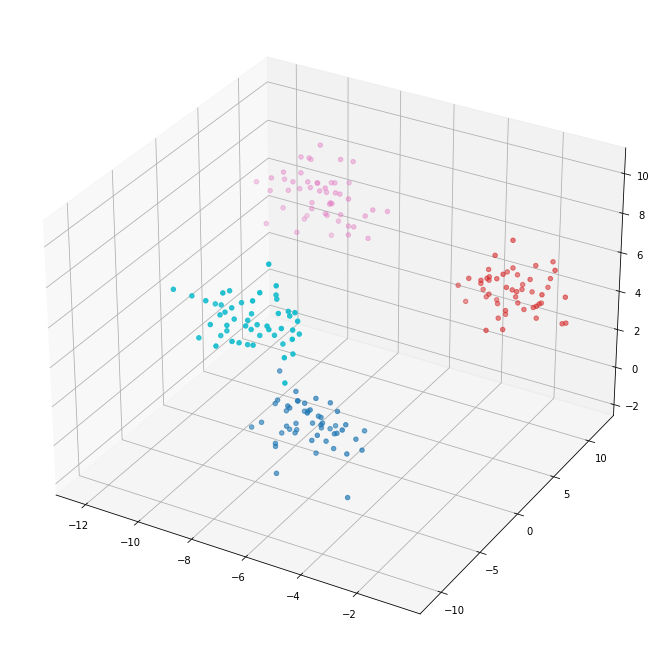

In [19]:
# Try instantiating a model with 4 centers
kmeans_4 = KMeans(n_clusters=4)

# Then fit the model to your data using the fit method
model_4 = kmeans_4.fit(data)

# Finally predict the labels on the same data to show the category that point belongs to
labels_4 = model_4.predict(data)

# If you did all of that correctly, this should provide a plot of your data colored by center
plot_data(data, labels_4)

`4.` Now try again, but this time fit kmeans using 2 clusters instead of 4 to your data.

C:\Users\Amil\AppData\Local\Temp/ipykernel_16176/2364164972.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


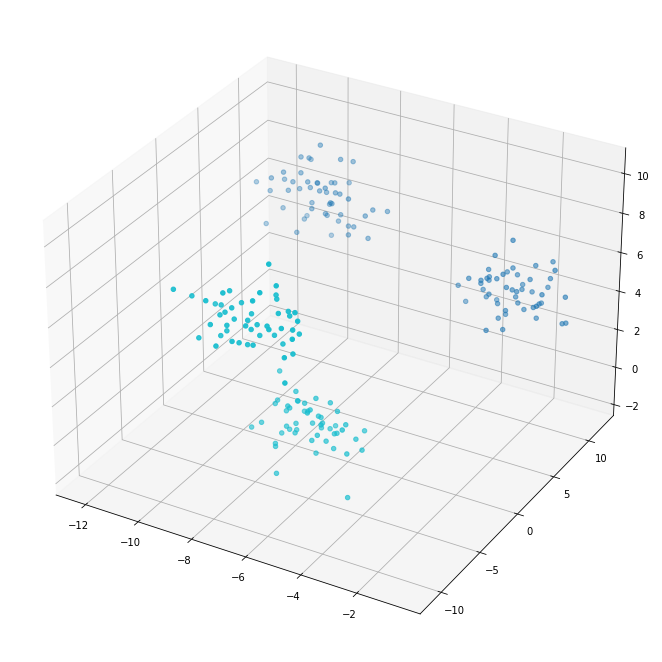

In [20]:
# Try instantiating a model with 2 centers
kmeans_2 = KMeans(n_clusters=2)

# Then fit the model to your data using the fit method
model_2 = kmeans_2.fit(data)

# Finally predict the labels on the same data to show the category that point belongs to
labels_2 = model_2.predict(data)

# If you did all of that correctly, this should provide a plot of your data colored by center
plot_data(data, labels_2)

`5.` Now try one more time, but with the number of clusters in kmeans to 7.

C:\Users\Amil\AppData\Local\Temp/ipykernel_16176/2364164972.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


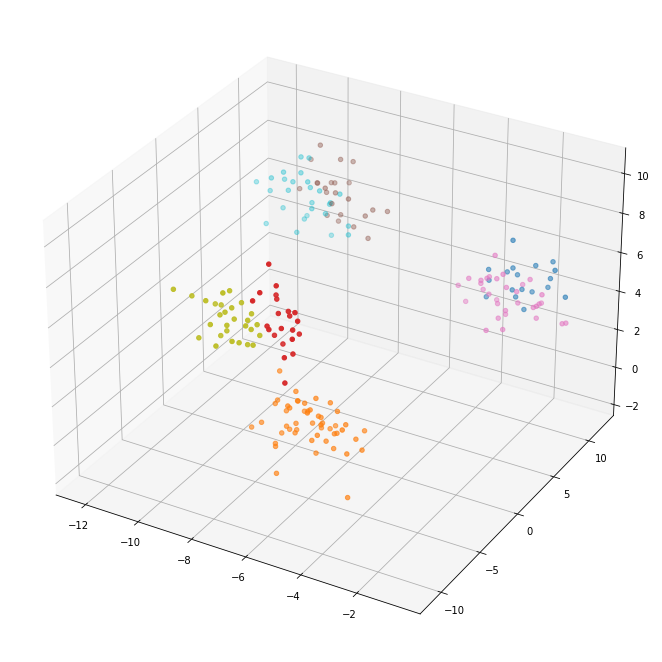

In [21]:
# Try instantiating a model with 7 centers
kmeans_7 = KMeans(n_clusters=7)

# Then fit the model to your data using the fit method
model_7 = kmeans_7.fit(data)

# Finally predict the labels on the same data to show the category that point belongs to
labels_7 = model_7.predict(data)

# If you did all of that correctly, this should provide a plot of your data colored by center
plot_data(data, labels_7)

Visually, we get some indication of how well our model is doing, but it isn't totally apparent. Each time additional centers are considered, the distances between the points and the center will decrease.  However, at some point, that decrease is not substantial enough to suggest the need for an additional cluster.  

Using a scree plot is a common method for understanding if an additional cluster center is needed.  The elbow method used by looking at a scree plot is still pretty subjective, but let's take a look to see how many cluster centers might be indicated.
_________

`6.` Once you have **fit** a kmeans model to some data in sklearn, there is a **score** method, which takes the data.  This score is an indication of how far the points are from the centroids.  By fitting models for centroids from 1-10, and keeping track of the score and the number of centroids, you should be able to build a scree plot.  

This plot should have the number of centroids on the x-axis, and the absolute value of the score result on the y-axis.  You can see the plot I retrieved by running the solution code.  Try creating your own scree plot, as you will need it for the final questions.

C:\Users\Amil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


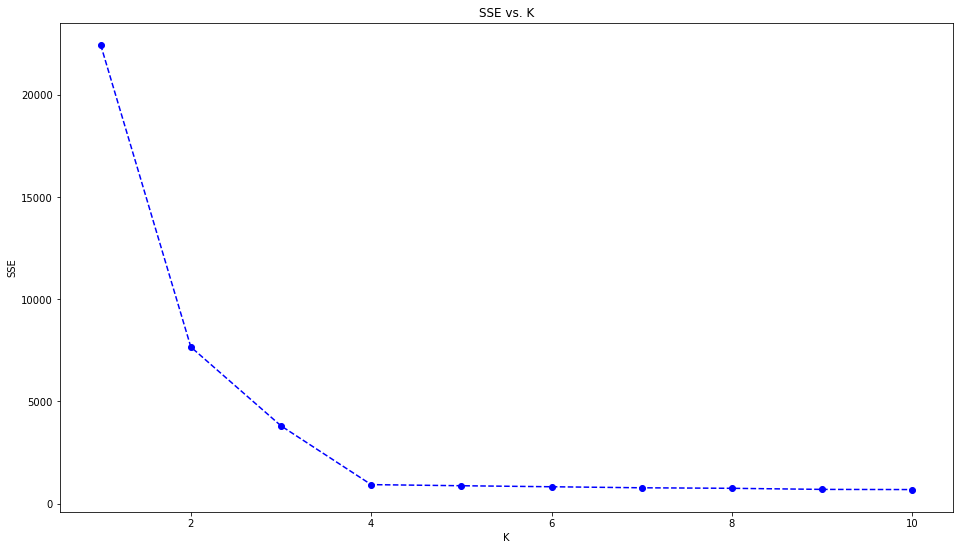

In [22]:
# A place for your work - create a scree plot - you will need to
# Fit a kmeans model with changing k from 1-10
# Obtain the score for each model (take the absolute value)
# Plot the score against k

def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding SSE for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the SSE score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)

    # Then fit the model to your data using the fit method
    model = kmeans.fit(data)
    
    # Obtain a score related to the model fit
    score = np.abs(model.score(data))
    
    return score

scores = []
centers = list(range(1,11))

for center in centers:
    scores.append(get_kmeans_score(data, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K');

In [23]:
# Run solution

def fit_mods():
    scores = []
    centers = list(range(1,11))

    for center in centers:
        scores.append(get_kmeans_score(data, center))

    return centers, scores

C:\Users\Amil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


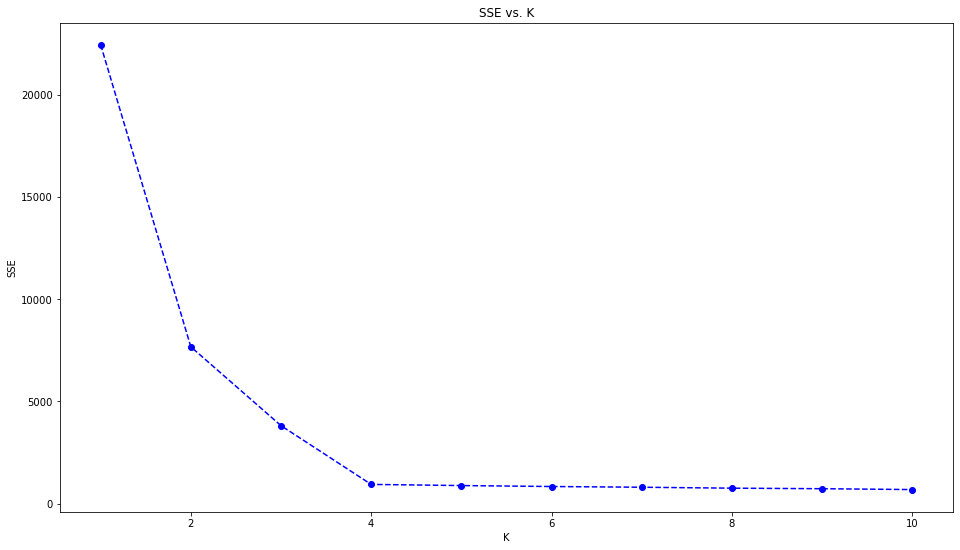

In [24]:
centers, scores = fit_mods()

#Your plot should look similar to the below
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K');

`7.` Using the scree plot, how many clusters would you suggest as being in the data?  What is K?

`Ans: ` 4